In [13]:
#%%
import os
import shutil
import random
from site import execsitecustomize
import numpy as np
import pandas as pd
import sys

from datetime import datetime

import math

import matplotlib.pyplot as plt
import csv
import re

import seaborn as sns


In [2]:
print("helloworld")

helloworld


In [3]:
# dirList = os.listdir('.')
# folders = [f for f in dirList if os.path.isdir(f)]
# folders.sort()
# for f in folders:
#     print(f'Folder: {f}')
#     if os.path.exists(f): 
#         evalRegionSampling(os.path.normpath(f))
#         print('----------------------------')
#     else:
#         print('folder does not seem to exist')
# # writeOutput(output, outFilePath)

In [4]:
# # folders = ["./T0.7_d20"]
# dirList = os.listdir('.')
# folders = [f for f in dirList if os.path.isdir(f)]

# for folder in folders:
#     dirList = os.listdir(folder)
#     scalarSamples = [f for f in dirList if 'scalquant_all_reg1' in f]
#     # print(dirList)
#     if len(scalarSamples) == 0:
#         print(f'no relevant files found in folder {folder}.')
#     else:
#         print(f"folder: {folder}")
#         for sample in scalarSamples:
#         # sample = scalarSamples[-1]
#             samplePath = os.path.join(folder, sample)
#             sampledf = pd.read_csv(samplePath, delimiter='\s+')

#             sampledf["rho[0]"].plot()
#     plt.show()


no relevant files found in folder ppls1.
no relevant files found in folder _oldRuns.
no relevant files found in folder .git.
max timestep = 10000
folder: T0.7_d4_r6


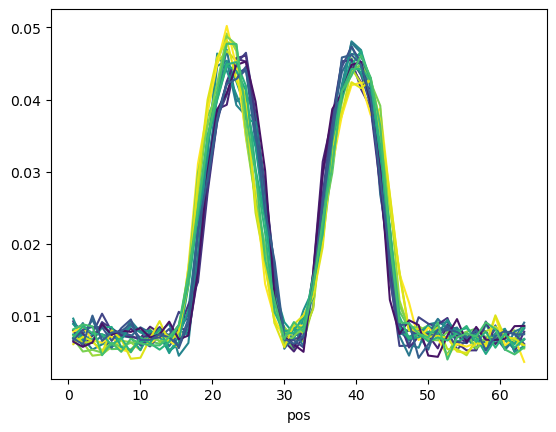

In [5]:
# folders = ["./T0.7_d20"]
dirList = os.listdir('.')
folders = [f for f in dirList if os.path.isdir(f)]


fig, ax = plt.subplots()
# ax2 = ax.twinx()



for folder in folders:
    dirList = os.listdir(folder)
    scalarSamples = [f for f in dirList if 'scalquant_all_reg1' in f]
    # print(dirList)
    if len(scalarSamples) == 0:
        print(f'no relevant files found in folder {folder}.')
    else:
        maxTimeStep =  int(re.findall(r'\d+', sorted(scalarSamples)[-1])[1])
        print(f'max timestep = {maxTimeStep}')

        print(f"folder: {folder}")
        for sample in scalarSamples:
        # sample = scalarSamples[-1]
            timeStep = int(re.findall(r'\d+', sample)[1]) 

            samplePath = os.path.join(folder, sample)
            sampledf = pd.read_csv(samplePath, delimiter='\s+')

            sampledf.plot(x="pos", y="rho[0]", ax=ax, c=plt.cm.viridis(timeStep/ maxTimeStep))
            ax.get_legend().remove()

        

max timestep = 10000
folder: T0.7_d4_r6


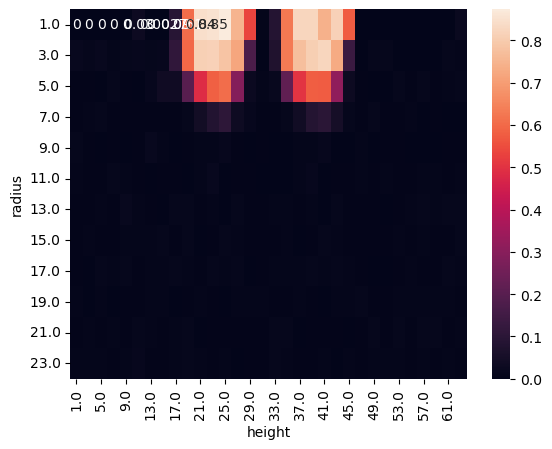

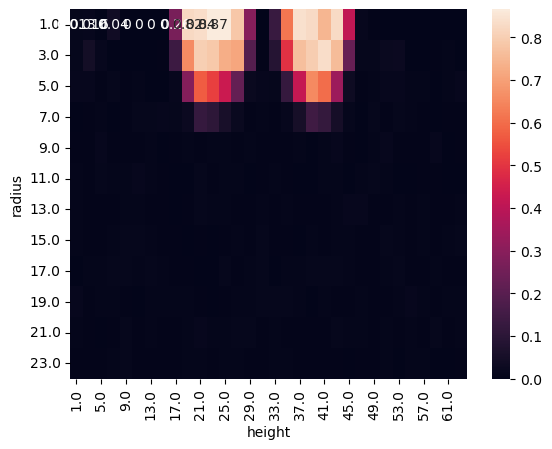

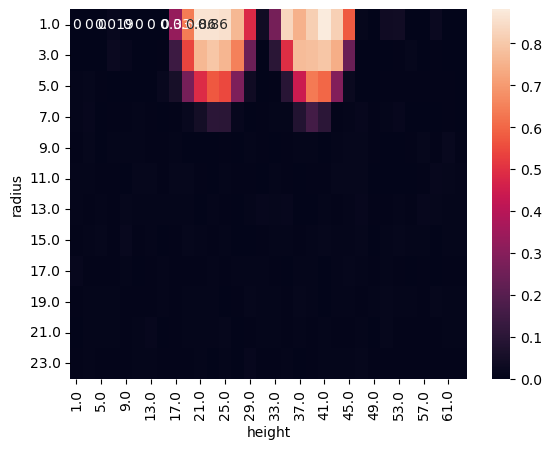

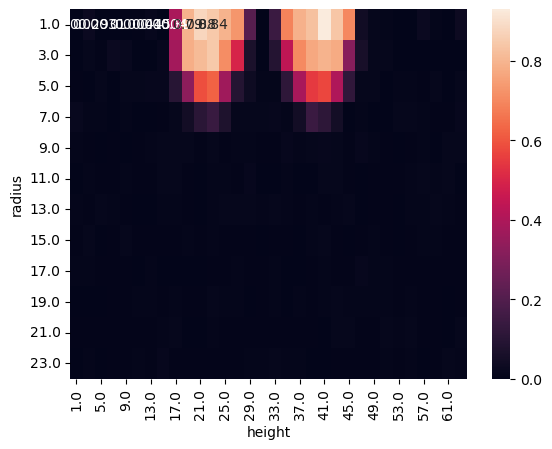

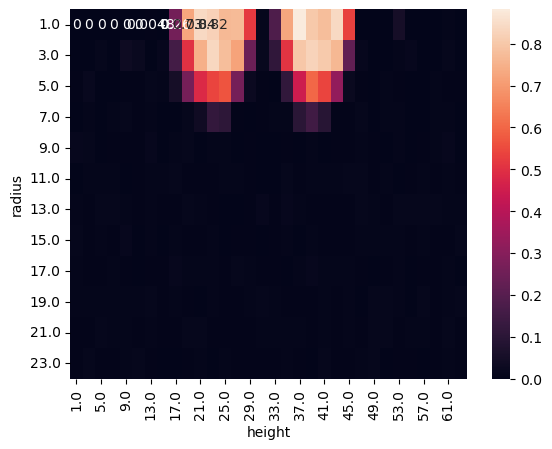

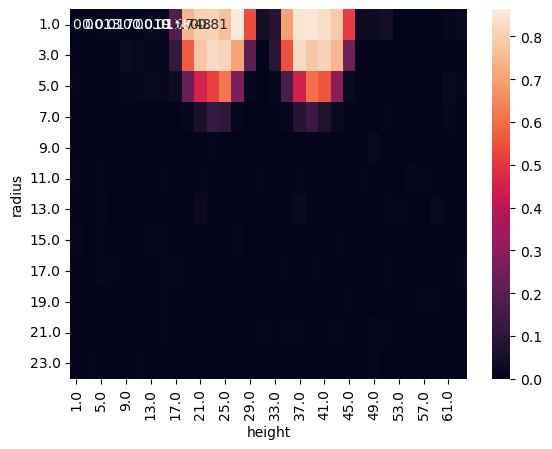

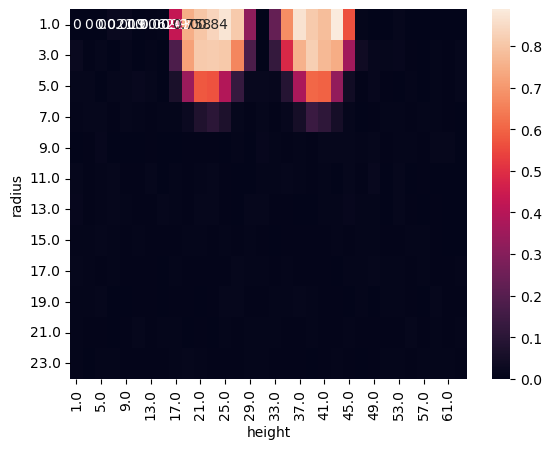

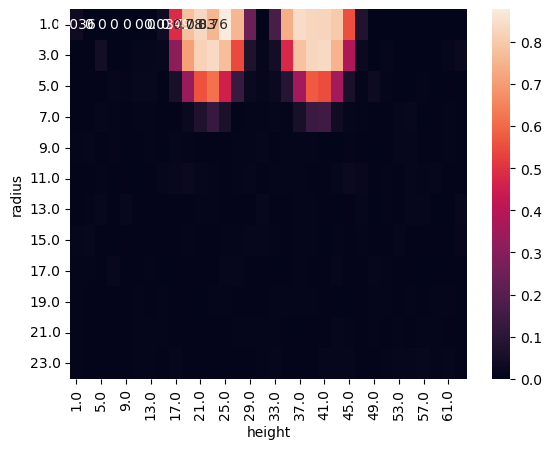

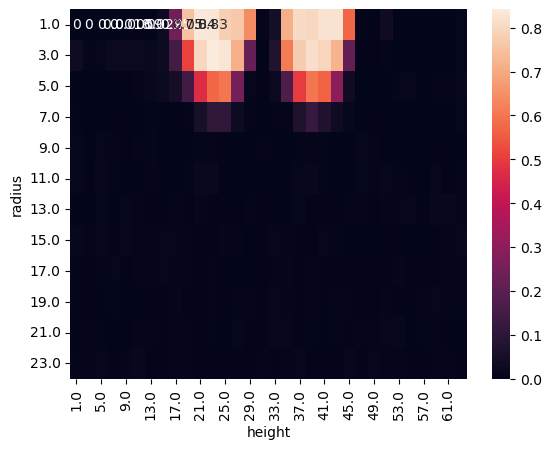

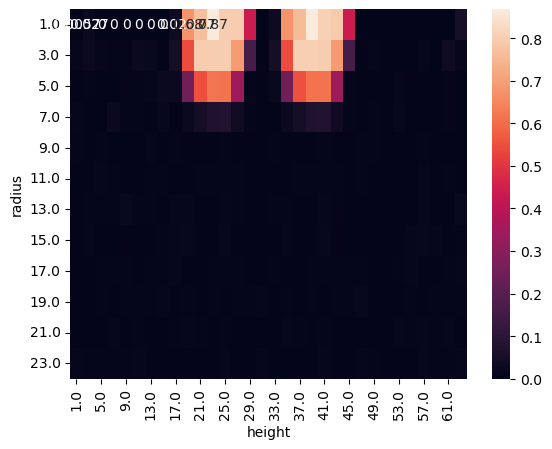

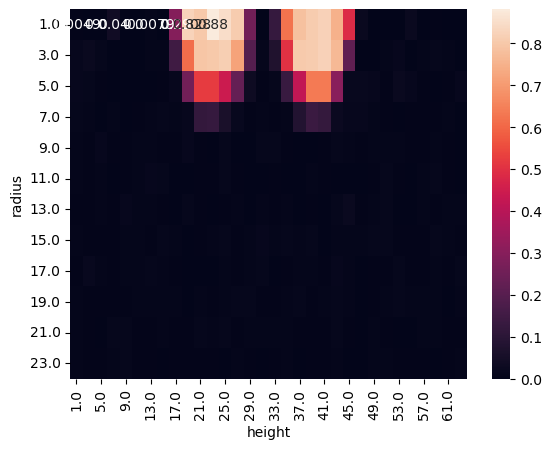

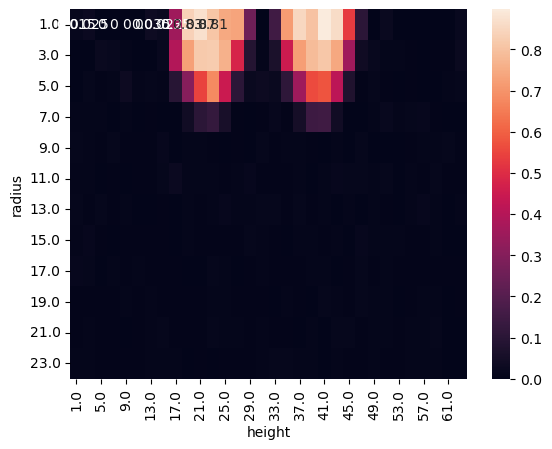

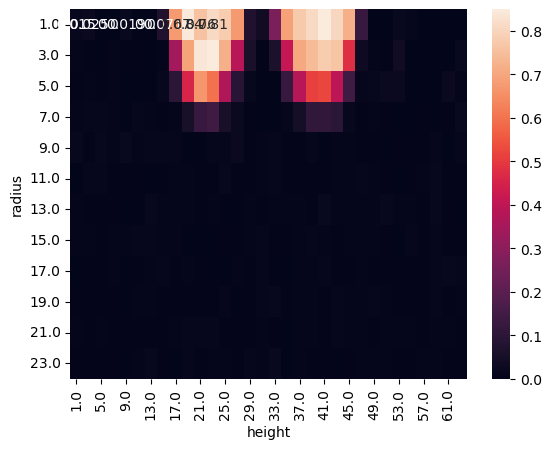

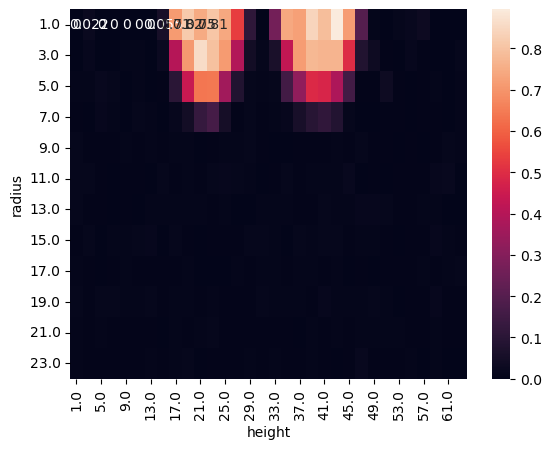

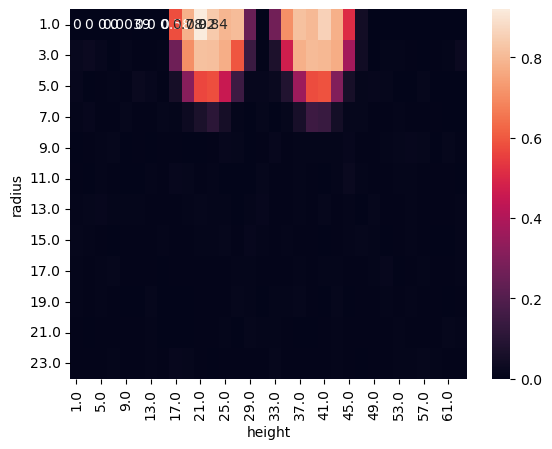

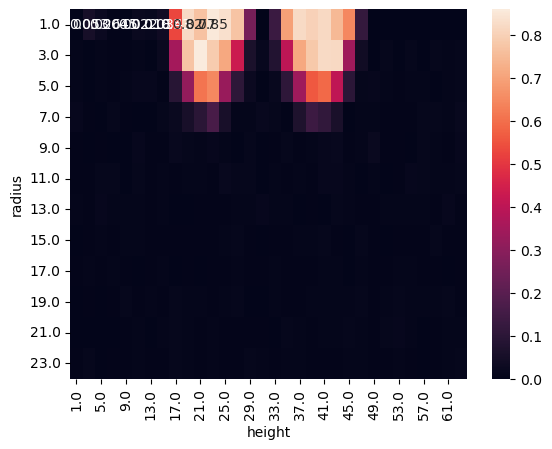

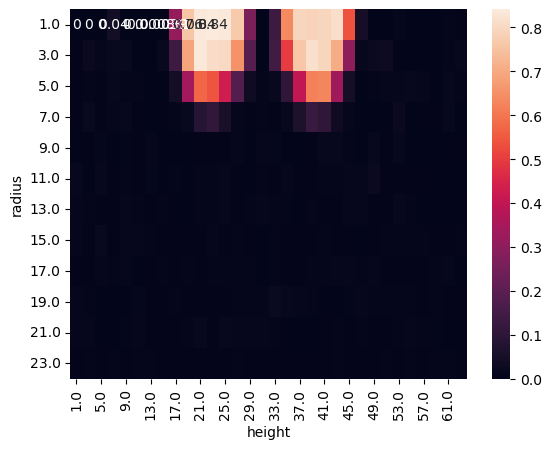

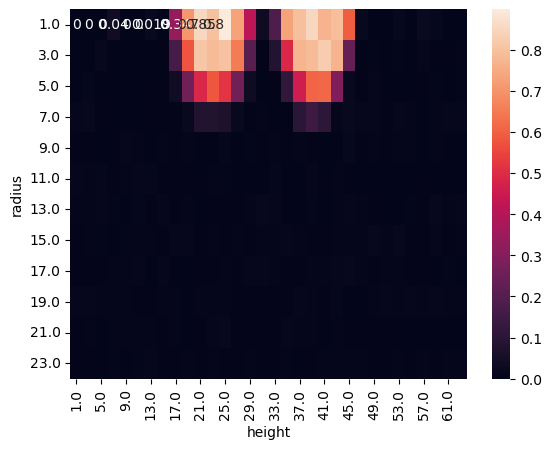

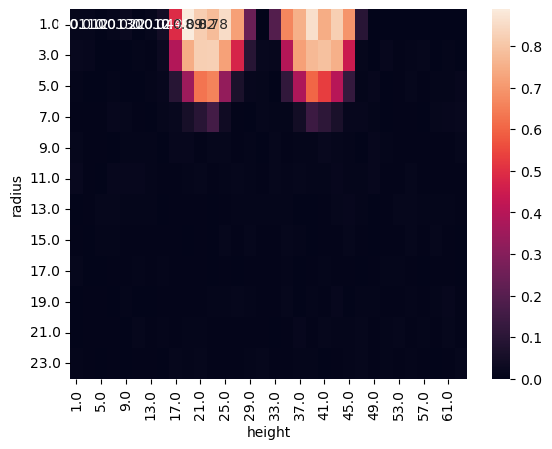

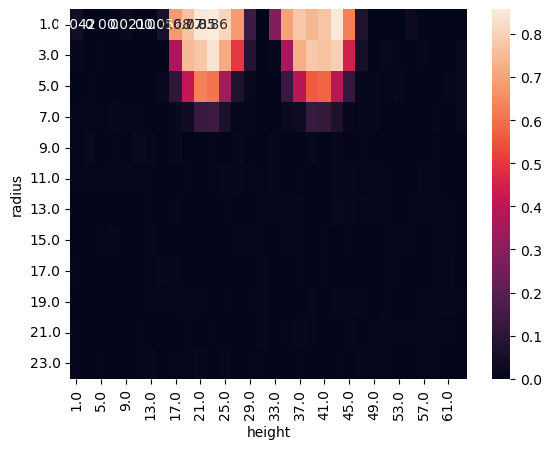

In [16]:
# folders = ["./T0.7_d20"]
dirList = os.listdir('.')
# folders = [f for f in dirList if os.path.isdir(f)]
folders = ["T0.7_d4_r6"]

for folder in folders:
    dirList = os.listdir(folder)
    scalarSamples = [f for f in dirList if 'CylindricSampling' in f]
    # print(dirList)
    if len(scalarSamples) == 0:
        print(f'no relevant files found in folder {folder}.')
    else:
        fig, ax = plt.subplots()
        maxTimeStep =  int(re.findall(r'\d+', sorted(scalarSamples)[-1])[0])
        print(f'max timestep = {maxTimeStep}')

        print(f"folder: {folder}")
        for sample in scalarSamples:
        # sample = scalarSamples[-1]
            timeStep = int(re.findall(r'\d+', sample)[0]) 

            samplePath = os.path.join(folder, sample)
            sampledf = pd.read_csv(samplePath, delimiter='\s+')
            #  height,  radius, numParts, rho, T,   ekin, p,  T_r,   T_y, T_t,   v_r,   v_y, v_t, p_r, p_y,     p_t, numSamples

            pivot = sampledf.pivot(index='radius', columns='height', values='rho')
            ax = sns.heatmap(pivot,annot=True)

            plt.show()
            
            # sampledf[sampledf["radius"]<2].plot(x="height", y="rho", ax=ax, c=plt.cm.viridis(timeStep/ maxTimeStep))
            # ax.get_legend().remove()

        

(0.7866611943875055, 0.007314397513485199)